# Importación de librerias

In [31]:
#Sección de librerias
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,uniform,expon


# Limpieza de los datos 

In [2]:
#Sección de carga de datasets
file1 = 'RunningData.csv'
file2= 'Accidentalidad_en_Barranquilla.xls'

In [3]:
#Dataframes
running = pd.read_csv(file1)
accbaq = pd.read_excel(file2)

In [4]:
#Sacamos los datos necesarios para el análisis
distancia = running['Distance (km)']
accdate = accbaq[['FECHA_ACCIDENTE','CANTIDAD_ACCIDENTES']]

# Running Data Analysis

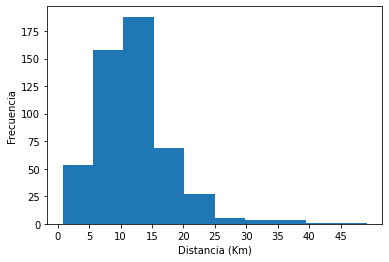

In [5]:
c = int(np.ceil(1+np.log2(508)))#Usamos la regla de Sturges para una mejor división
plt.hist(distancia,bins=c)
plt.xlabel("Distancia (Km)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0,50,5))
plt.show()

In [12]:
distancia.describe()

count    508.000000
mean      12.041732
std        6.064125
min        0.760000
25%        9.495000
50%       11.460000
75%       13.642500
max       49.180000
Name: Distance (km), dtype: float64

<p>Con un primer vistazo a los datos podemos darnos una idea de las probabilidades para cada una de las pregunta. Podemos observar que la frecuencia de personas que recorren 10km es mayor que las que recorren 15km. Además, también se podría decir que los datos tienen forma de una distribución normal</p>

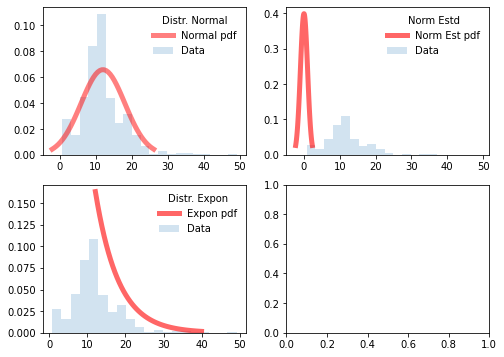

In [33]:
#Declarando los gráficos
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8,6)

#Distribución Normal
mun, sign = distancia.mean(),distancia.std()
xn = np.linspace(norm.ppf(0.01, mun, sign), norm.ppf(0.99, mu, sign))
ax[0,0].plot(xn, norm.pdf(xn, mun, sign), 'r-', lw=5, alpha=0.5, label='Normal pdf')
x_rvn = distancia
ax[0,0].hist(x_rvn,bins=20, density=True, histtype='stepfilled', alpha=0.2, label='Data')
ax[0,0].legend(loc='best', frameon=False,title='Distr. Normal')

#Distribución Normal Estandar
xne = np.linspace(norm.ppf(0.01), norm.ppf(0.99),100)
ax[0,1].plot(xne, norm.pdf(xne), 'r-', lw=5, alpha=0.6, label='Norm Est pdf')
x_rvne = distancia
ax[0,1].hist(x_rvne, bins = 20,density=True, histtype='stepfilled', alpha=0.2, label ='Data')
ax[0,1].legend(loc='best', frameon=False, title ='Norm Estd')

#Distribución Exponencial
mue, sige = distancia.mean(),distancia.std()
xe = np.linspace(expon.ppf(0.01, mue, sige), expon.ppf(0.99, mue, sige))
ax[1,0].plot(xe, expon.pdf(xe, mue, sige), 'r-', lw=5, alpha=0.6, label='Expon pdf')
x_rve= distancia
ax[1,0].hist(x_rve, bins=20 , density=True, histtype='stepfilled', alpha=0.2, label ='Data')
ax[1,0].legend(loc='best', frameon=False, title='Distr. Expon')



<p>Se puede observar que lo especulado anteriormente se corrobora con la gráfica anterior, los datos se ajustan a una distribución normal. </p>

In [34]:
from scipy.stats import norm
norm.pdf(10,mun,sign)

0.06216215117012073

In [35]:
1 - norm(mun, sign).cdf(15)

0.3128347980883608

<strong> INSERTE RESPUESTAS </strong>

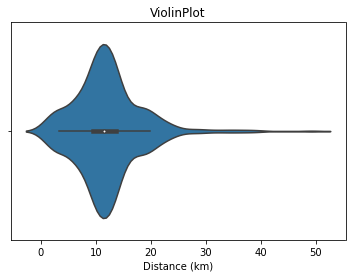

In [74]:
sns.violinplot(running["Distance (km)"]).set(
    title = "ViolinPlot")
plt.show()

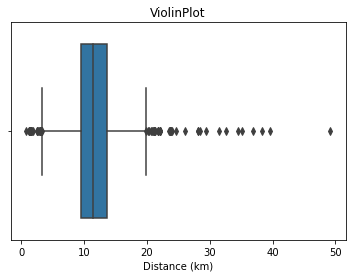

In [75]:
sns.boxplot(running["Distance (km)"]).set(
    title = "ViolinPlot")
plt.show()

<strong> Valor esperado vs Valor observado </strong>

# Vehicle Accident Analysis

In [37]:
accxday = accdate.groupby(['FECHA_ACCIDENTE']).count()
accxday

,CANTIDAD_ACCIDENTES
FECHA_ACCIDENTE,
2015-01-01,10
2015-01-02,13
2015-01-03,11
2015-01-04,7
2015-01-05,14
...,...
2020-05-26,10
2020-05-27,2
2020-05-28,12


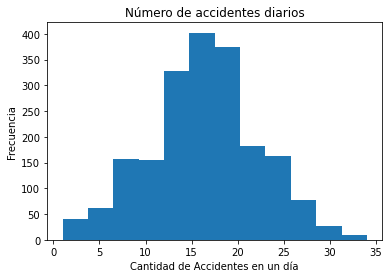

In [38]:
c = int(np.ceil(1+np.log2(1974)))#Usamos la regla de Sturges para una mejor división
plt.hist(accxday['CANTIDAD_ACCIDENTES'],bins=c) 
plt.title('Número de accidentes diarios')
plt.xlabel('Cantidad de Accidentes en un día')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
accxday.describe()

,CANTIDAD_ACCIDENTES
count,1974.000000
mean,16.269504
std,5.901138
min,1.000000
25%,12.000000
50%,16.000000
75%,20.000000
max,34.000000


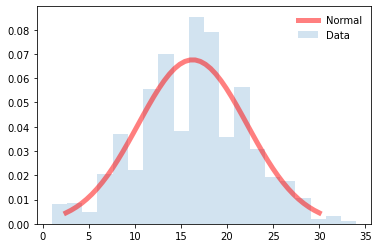

In [40]:
fig, ax = plt.subplots(1, 1)

mu1, sig1 = accxday['CANTIDAD_ACCIDENTES'].mean(),accxday['CANTIDAD_ACCIDENTES'].std()

x = np.linspace(norm.ppf(0.01, mu1, sig1), norm.ppf(0.99, mu1, sig1))

#Plotting x
ax.plot(x, norm.pdf(x, mu1, sig1), 'r-', lw=5, alpha=0.5, label='Normal')

#Generate random numbers and plotting
x_rv = accxday['CANTIDAD_ACCIDENTES']
ax.hist(x_rv,bins=20, density=True, histtype='stepfilled', alpha=0.2, label='Data')

#Define legend attributes and show figure
ax.legend(loc='best', frameon=False)

In [41]:
norm(mu1, sig1).cdf(10)

0.1440218895795916

In [42]:
1 - norm(mu1, sig1).cdf(15)

0.5851664727945947

In [138]:
0.1440218895795916 + 0.5851664727945947

0.7291883623741863

In [144]:
mu1

16.26950354609929